# Scaling for simulation

In [40]:
# NEW NUMBERS (11/11)
n_sim_dd = 4e9 # Mail from Jacques for new dataset, Nov 11
n_at_ne_dd = 116745 # NE213_Combined
a_dd = 0.004378590912205715 # From fit, rebinned version (checked)
a_dd_rel_unc = 0.00017208925339947404 / 0.004378590912205715
# To check if this makes sense between datasets.
f_useful_dd = n_at_ne_dd / n_sim_dd


In [41]:
# Uncertainty for the low-stat DT dataset
# 1.2421 +- 0.233994
# print(0.233994 / 1.2421)

In [42]:
# DT numbers, Simulation result Nov 1, wrong energy
n_sim_dt   = 9.5e8 # Mail from JP Nov 1
n_at_ne_dt = 20044 # Dataset from Nov 1; this is at the wrong energy :(
f_useful_dt = n_at_ne_dt / n_sim_dt # Fraction of events that is useful
# a_dt = 0.043077878353139365 # From fit
a_dt = 0.0794423561716775 # THIS IS ACTUALLY FROM THE FIT

In [43]:
# DT numbers simulation Dec 5., wrong energy again
n_sim_dt = 9.5e8 # Mail from JP Dec 5
n_at_ne_dt = 14356 # Why so different?
f_useful_dt = n_at_ne_dt / n_sim_dt
a_dt = 0.08197476716848429 #  +- 0.015573331817021502 according to fit, but may improve with better E
a_dt_rel_unc = 0.015573331817021502 / 0.08197476716848429

In [61]:
# print(f_useful_dd, f_useful_dt)
# DD and DT should be more or less the same (right?)
print('Fraction of neutrons arriving at NE213: %.1f per million for DD, %.1f per million for DT' %
     (f_useful_dd*1e6, f_useful_dt*1e6))

Fraction of neutrons arriving at NE213: 29.2 per million for DD, 15.1 per million for DT


In [45]:
# OK, here goes.
# Normalize scaling factor a per number of events.
# Does this make sense? Well, suppose you have a giant number of events. Then your scaling factor becomes
# smaller and smaller. So, this should be up-corrected, i.e. multiplied by something proportional
# to the number of simulated events.
#
# Other way to look at it: the spectrum should be normalized before fitting, then the scaling factor corrects for
# this happening.
#
# Check: a INcreases if you DEcrease the statistics!
a_eff_dd = a_dd * n_sim_dd
a_eff_dt = a_dt * n_sim_dt

In [46]:
# Then, there is rebinning. 
# Lets get this straight. For the high energy, because of rebinning, the event rate is measured per 119 keVee.
# So. The factor a you need for dt is actually LOWER since you rebinned to make all values higher.
# This will give you a factor 50 or 25, depending on rebinning (discussed later)
a_eff_dt = a_eff_dt / 50
# 
# Well, how about checking the non-rebinned factor?
# I checked. It is the same. So 50 is correct.

In [47]:
# The final ratio:
(a_eff_dt/a_eff_dd)

0.08892818531296637

## Comparison to AZ

In [48]:
# If we want to check if this result is consistent with Andreas' result, we should apply the same energy selection that 
# he does. For this, we'll read in the energy and then check what fraction is in range, then correct the fraction.

In [49]:
def read_simulation(fn, col_n = 0):    
    # Relevant imports to reading in 
    import ROOT
    import root_numpy as rn

    # Actually read the root file
    f = ROOT.TFile(fn)
    treenames = rn.list_trees(fn)
    assert len(treenames) == 1
    tree = f.Get(treenames[0])
    data = rn.tree2array(tree)

    # Somehow the data is stored in the form of an array of tuples... wtf? So here's a hack to get it out!
    sim_energies = np.array([d[col_n] for d in data])
    print('Read a total of %d events from file %s.' % (len(sim_energies), fn))
    return sim_energies

In [50]:
e_at_ne_dt = read_simulation('./simu/161205_DT/NE213_DT_Combined2.root')

# e_at_ne_dt = np.concatenate([
#     read_simulation('./simu/161101_14-1_MeV/NE213_DT_Spectrum.root'),
#     read_simulation('./simu/161101_14-1_MeV/NE213_DT_Spectrum2.root'),
#     read_simulation('./simu/161101_14-1_MeV/NE213_DT_Spectrum3.root'),
#     read_simulation('./simu/161101_14-1_MeV/NE213_DT_Spectrum4.root')])/1000

Read a total of 14356 events from file ./simu/161205_DT/NE213_DT_Combined2.root.


In [51]:
e_at_ne_dd = read_simulation('./simu/161111_DD/NE213_DD_Combined.root')/1000

Read a total of 116745 events from file ./simu/161111_DD/NE213_DD_Combined.root.


In [52]:
# This is the number of neutron events in the specified energy range
n_in_range_dd = len(e_at_ne_dd[(e_at_ne_dd > 2.0) & (e_at_ne_dd < 2.8) ])
n_in_range_dt = len(e_at_ne_dt[(e_at_ne_dt > 2.5)])

In [53]:
# ...And this is the fraction of events in range
f_in_range_dt = n_in_range_dt / len(e_at_ne_dt)
f_in_range_dd = n_in_range_dd / len(e_at_ne_dd)

In [54]:
# By chance, these are nearly the same, so the correction is small.
print(f_in_range_dd, f_in_range_dt)

0.6242494325238769 0.9621760936193926


In [55]:
# Now correction the previously found ratio
# It makes sense that fraction is LOWER, since a lower number of DT neutrons are in the energy range.
((a_eff_dt * f_in_range_dt) / (a_eff_dd * f_in_range_dd))

0.13706792429293665

## Compare the two HE datasets

In [56]:
e_at_ne_dt_nov01 = np.concatenate([
    read_simulation('./simu/161101_14-1_MeV/NE213_DT_Spectrum.root'),
    read_simulation('./simu/161101_14-1_MeV/NE213_DT_Spectrum2.root'),
    read_simulation('./simu/161101_14-1_MeV/NE213_DT_Spectrum3.root'),
    read_simulation('./simu/161101_14-1_MeV/NE213_DT_Spectrum4.root')])/1000
e_at_ne_dt_dec05 = read_simulation('./simu/161205_DT/NE213_DT_Combined2.root')/1000


Read a total of 3808 events from file ./simu/161101_14-1_MeV/NE213_DT_Spectrum.root.
Read a total of 3871 events from file ./simu/161101_14-1_MeV/NE213_DT_Spectrum2.root.
Read a total of 6103 events from file ./simu/161101_14-1_MeV/NE213_DT_Spectrum3.root.
Read a total of 6262 events from file ./simu/161101_14-1_MeV/NE213_DT_Spectrum4.root.
Read a total of 14356 events from file ./simu/161205_DT/NE213_DT_Combined2.root.


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

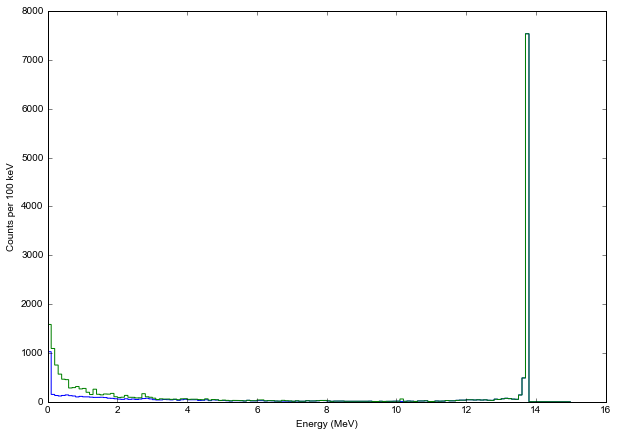

In [63]:
plt.figure(figsize= (10,7))
plt.hist(e_at_ne_dt_dec05, range=(0,15), bins=150, histtype= 'step')
plt.hist(e_at_ne_dt_nov01, range=(0,15), bins=150, histtype= 'step')
plt.ylabel('Counts per 100 keV')
plt.xlabel('Energy (MeV)')
plt.savefig('dataset_comparison.png', bbox_inches = 'tight')
plt.show()